<a href="https://colab.research.google.com/github/RELEBOHILE-PHEKO/CKD_Prediction_API/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Chronic Kidney Disease Prediction Model
# 1. Import Required Libraries
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import warnings
warnings.filterwarnings("ignore")

In [15]:
# 2. Load Dataset
# Use the raw GitHub URL for the CSV data
df = pd.read_csv("https://raw.githubusercontent.com/RELEBOHILE-PHEKO/CKD_Prediction_API/main/Chronic_Kidney_Disease_data.csv")

print("Dataset loaded successfully.")
print("Rows:", df.shape[0], " | Columns:", df.shape[1])
display(df.head())

# 3. Handle Missing Values
df.replace('?', np.nan, inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

print("Missing values handled.")

# 4. Encode Categorical Features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

print("Categorical columns encoded.")

# 5. Split Data into Features and Target
from sklearn.model_selection import train_test_split
target_column = 'Diagnosis'
X = df.drop(target_column, axis=1)
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Data split complete.")
print("Training size:", X_train.shape[0], "| Test size:", X_test.shape[0])

Dataset loaded successfully.
Rows: 1659  | Columns: 54


,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,...,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential


Missing values handled.
Categorical columns encoded.
Data split complete.
Training size: 1327 | Test size: 332


Feature scaling complete.
Model training complete.
Model Accuracy: 92.77%

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.04      0.08        24
           1       0.93      1.00      0.96       308

    accuracy                           0.93       332
   macro avg       0.72      0.52      0.52       332
weighted avg       0.90      0.93      0.90       332



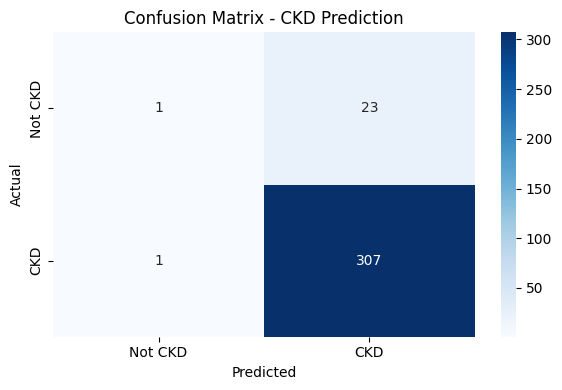

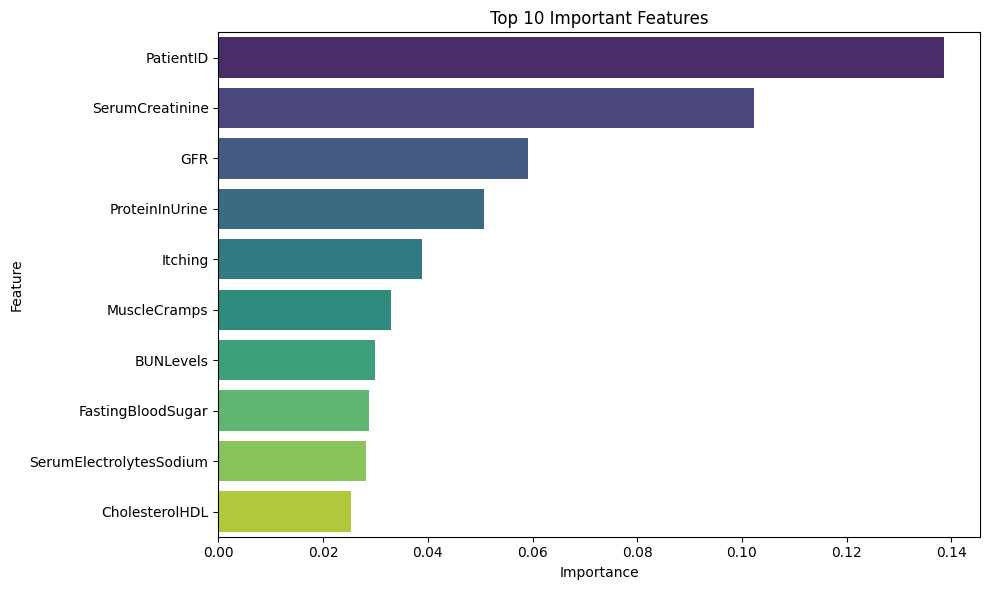

Model and Scaler saved as 'ckd_model.pkl' and 'scaler.pkl'.
Sample Prediction: [1]


In [13]:
# 6. Scale Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Feature scaling complete.")

# 7. Train Model (Random Forest)
model = RandomForestClassifier(
    n_estimators=100, random_state=42, max_depth=10, min_samples_split=5)
model.fit(X_train, y_train)
print("Model training complete.")

# 8. Evaluate Model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 9. Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CKD Prediction')
plt.tight_layout()
plt.show()

# 10. Feature Importance Visualization
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='viridis')
plt.title('Top 10 Important Features')
plt.tight_layout()
plt.show()

# 11. Save Model and Scaler
joblib.dump(model, "ckd_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Model and Scaler saved as 'ckd_model.pkl' and 'scaler.pkl'.")

# 12. Example Prediction
sample = X_test[0].reshape(1, -1)
prediction = model.predict(sample)
print("Sample Prediction:", prediction)